In [1]:
#import neccary libaries
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# pip install textract

In [2]:
#priting all files present in a given directory
def print_file_names(directory):
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            print(filename)

directory="Resumes/PeopleSoft"
print_file_names(directory)

Peoplesoft Admin_AnubhavSingh.docx
Peoplesoft Admin_G Ananda Rayudu.docx
Peoplesoft Admin_Gangareddy.docx
Peoplesoft Admin_Murali.docx
Peoplesoft Admin_Priyanka Ramadoss.docx
Peoplesoft Admin_SirazuddinMohammad.docx
Peoplesoft Admin_srinivasarao.docx
Peoplesoft Admin_Varkala Vikas.docx
Peoplesoft Admin_Vinod Akkala.docx
PeopleSoft DBA_Ganesh Alladi.docx
PeopleSoft DBA_Vivekanand Sayana.docx
Peoplesoft Finance_Arun Venu.docx
Peoplesoft Finance_Pritam Biswas.docx
Peoplesoft Finance_Rahul Ahuja.docx
Peoplesoft FSCM_HariNarayana.docx
Peoplesoft FSCM_Murali.docx
Peoplesoft FSCM_PriyabrataHota.docx
Peoplesoft FSCM_R Ahmed.docx
Peoplesoft FSCM_SUJATHA.docx
Resume_Subha Santosh_Peoplesoft FSCM.docx


In [3]:
#converting doc file to docx file

# import win32com.client as win32

# def convert_to_docx(doc_file):
#     word=win32.gencache.EnsureDispatch('Word.Application')
#     doc=word.Documents.Open(doc_file)
#     docx_file=os.path.splitext(doc_file)[0] + ".docx"
#     doc.SaveAs2(docx_file, FileFormat=16)
#     doc.Close()
    
# def convert_files_in_directory(directory):
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith(".doc"):
#                 doc_file = os.path.join(root, file)
#                 convert_to_docx(doc_file)
#                 os.remove(doc_file)  
#                 print(f"Converted and replaced '{doc_file}' with '{os.path.splitext(doc_file)[0]}.docx'")

# directory=r"C:\Users\Karthik\OneDrive\Desktop\NLP_project01\Resumes"
# convert_files_in_directory(directory)

In [4]:
#printing folder names which are present in the resumes folder
os.listdir('Resumes/')

['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday']

#  Exctract the Text from Dataset

In [5]:
#reading all files printing the peoplesoft folder and converting then to a data frame
file_path1 = []
category1  = []
directory1 = 'Resumes/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [6]:
#printing data frame by adding category to it
da1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
da1['Category1'] = category1
da1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


In [7]:
##reading all files printing the react js developer folder and converting then to a data frame
file_path2 = []
category2  = []
directory2 = 'Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [8]:
#printing data frame by adding category to it
da2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
da2['Category2'] = category2
da2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer


In [9]:
#reading all files printing the sql developer folder and converting then to a data frame
file_path3 = []
category3  = []
directory3 = 'Resumes/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [10]:
#printing data frame by adding category to it
da3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
da3['Category3'] = category3
da3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [11]:
#reading all files printing the workday folder and converting then to a data frame
file_path4 = []
category4  = []
directory4 = 'Resumes/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [12]:
#printing data frame by adding category to it
da4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
da4['Category4'] = category4
da4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


# Create a DataFrame¶

In [13]:
#creating one dataframe using all the above four dataframe
resume_data = da1.append([da2, da3, da4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


In [14]:
#printing information of the main dataframe
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  78 non-null     object
 1   Category1    20 non-null     object
 2   Category2    23 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


# 1 Merge all Unnecessary column in One Column

In [15]:
#merging all category columns and adding to one new column
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


In [16]:
#droping unnecessary category columns
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

# 1.2 Final Dataset

In [17]:
#printing final data frame
resume_data.head(25)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...


In [18]:
#printing data of raw details column of the fourth row
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\n\n\t61/46, MountPleasant, \n\n\tCoonoor\n\n\tThe Nilgiris- 643102                                                                                            \n\n\t\n\nCareer Objective\n\n\n\nTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\n\n\t\n\nProfile Summary\n\n\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\n\n\t\n\nProfessional Summary\n\n\n\nPeopleSoft Administrator (September 2016-Present)\n\n\n\nExperience in PeopleSoft Administration for Finance application.\n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\n\nActive monitoring in Non production databases and applications.\n\nKnowledgeable on PeopleSoft migrations using applicat

# 1.3save new CSV file

In [19]:
#saveing main data frame as a csv file 
resume_data.to_csv('Raw_Resume.csv', index=False)

# 2. Data Understanding

In [20]:
#printing raw resume csv file
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
73,Workday,Workday Integration Consultant\n\n\n\nName ...
74,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
75,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [21]:
#printing data which ever comes under workday category
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
57,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
58,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
59,Workday,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...
60,Workday,Harikrishna Akula ...
61,Workday,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...
62,Workday,G Himaja\n\n ...
63,Workday,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...
64,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
65,Workday,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...
66,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...


In [22]:
#checking null values
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# 2.1 Number of Words in each Resume

In [23]:
#counting number of words present in each row of raw details column
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1441
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


# 2.2 Number of Characters

In [24]:
#counting number of charcter present in each row of raw details column
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


# 2.3 Number of Stopwords¶

In [25]:
#counting number of stopwords present in each row of raw details columns 
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


# 2.4 Number of Numerics¶

In [26]:
#counting number of numbers present in each row of raw details columns 
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [27]:
#printing all details in one dataframe
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
73,Workday,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
74,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
75,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1031,6836,193,7


# 3 Text Pre-Processing

# 3.1Using Regular Expression

In [28]:
#here we are doing test preprocessing 
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [29]:
#adding preprocessed text column to raw resume file
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# 3.2 Clean Text from Resume

In [30]:
#printing resume data
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu profile summary years experience...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
73,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
74,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
75,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant professional ...


# 3.3 Save the Clean Data in new CSV File

In [31]:
#droping raw details column from raw resume csv file 
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
73,Workday,workday integration consultant name sri krishn...
74,Workday,srikanth workday hcm consultant seeking suitab...
75,Workday,workday hcm fcm name kumar role workday consul...
76,Workday,venkateswarlu workday consultant professional ...


In [32]:
#saveing above data frame as cleaned resume csv file
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [33]:
#printing cleaned resume csv file 
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
73,Workday,workday integration consultant name sri krishn...
74,Workday,srikanth workday hcm consultant seeking suitab...
75,Workday,workday hcm fcm name kumar role workday consul...
76,Workday,venkateswarlu workday consultant professional ...


In [34]:
#printing resume details of the fiveth row
resume_data.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

# 4 Named Entity Recognition (NER)¶

In [35]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
#counting each words how many times they are repeated
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 594), ('peoplesoft', 453), ('workday', 431), ('application', 417), ('using', 389), ('server', 359), ('data', 332), ('reports', 326), ('project', 317), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 215), ('client', 193), ('system', 191), ('tools', 190), ('integrations', 189), ('involved', 188), ('integration', 183), ('hcm', 182), ('support', 178), ('like', 177), ('skills', 169), ('good', 169), ('development', 165), ('creating', 164), ('working', 162), ('team', 162), ('people', 160), ('technical', 160), ('report', 155), ('services', 153), ('servers', 152), ('design', 151), ('testing', 150), ('created', 149), ('responsibilities', 147), ('various', 146), ('react', 145), ('oracle', 142), ('environment', 139), ('role', 136), ('management', 136), ('security', 134), ('developer', 134), ('eib', 134), ('production', 133)]


# 5 parts of speech (pos) Tagging

In [39]:
#highlighting parts of speech words
nlp = spacy.load('en_core_web_sm')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [40]:
#printing all noun and pronoun words
for token in doc_block[:30]:
    print(token,token.pos_)

d INTJ
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk NOUN
working VERB
knowledge NOUN
ansible ADJ
docker PROPN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting NOUN
shell NOUN
script NOUN
failures NOUN
techmahindra NOUN
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft PROPN
admin PROPN
skills NOUN


# 5.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [41]:
#printing only nouns and verbs
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'servers', 'weblogic', 'rdbms', 'oracle', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'servers', 'weblogic', 'rdbms', 'oracle', 'repository', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'scripting', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'process', 'scheduler', 'servers', 'applying', 'middleware', 'cpu', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting'

# 5.2 Counting all the Nouns and Verbs present in the Tokens of words

In [45]:
#counting nouns and verbs present in a each row
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:26]

,Words,Count
0,experience,557
1,application,415
2,using,389
3,server,350
4,reports,326
5,data,305
6,project,270
7,business,267
8,web,244
9,database,239


# 5.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

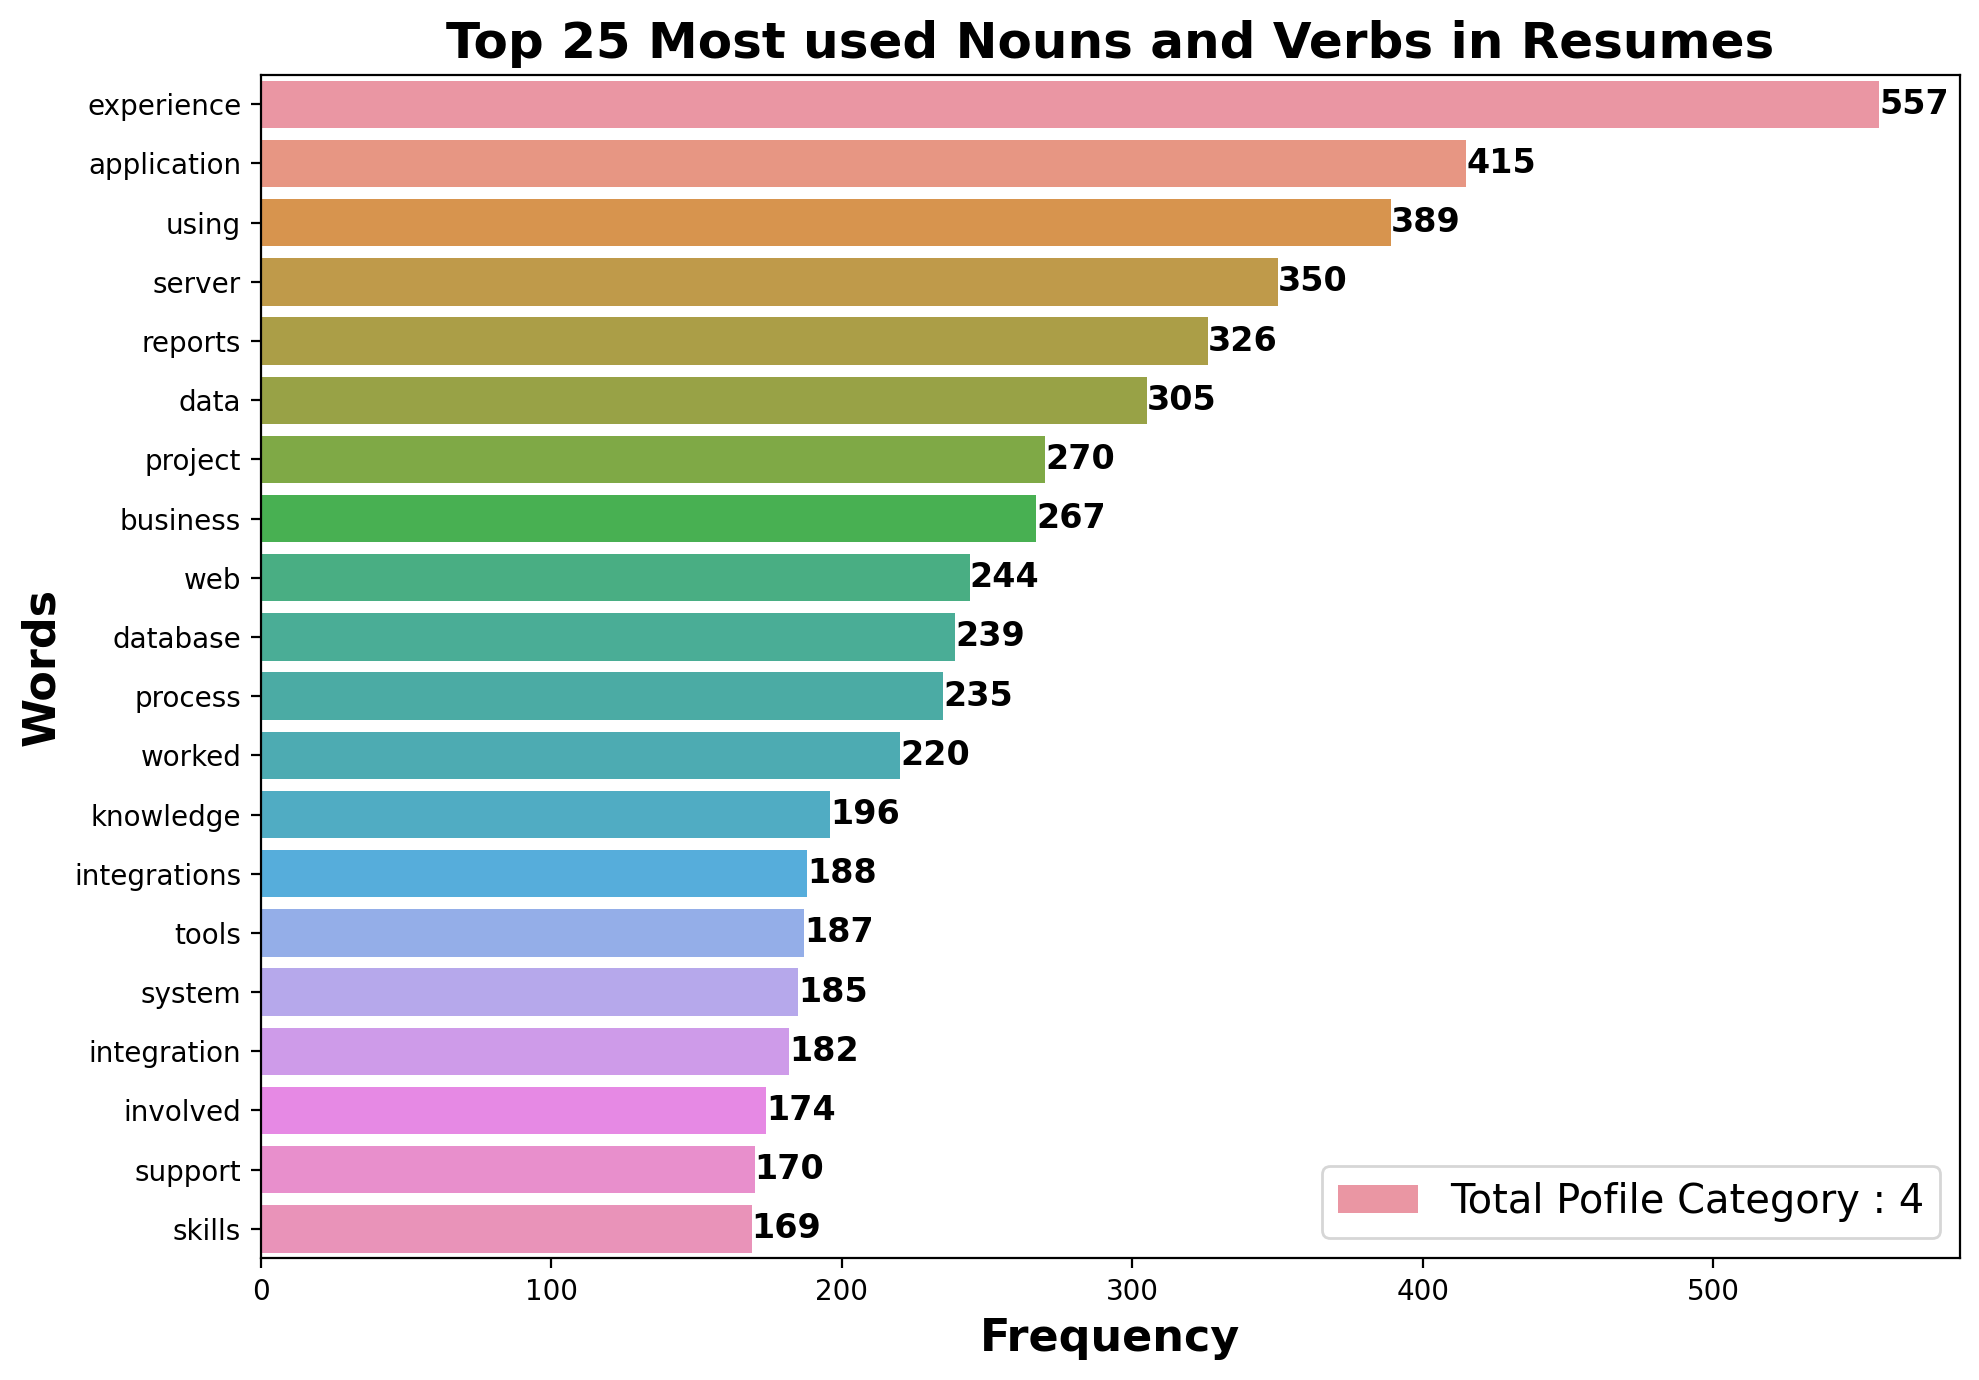

In [43]:
#ploting top 25 most used nouns and verbs in a resumes
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Top_Nouns_Verbs_Bar', dpi = 500)

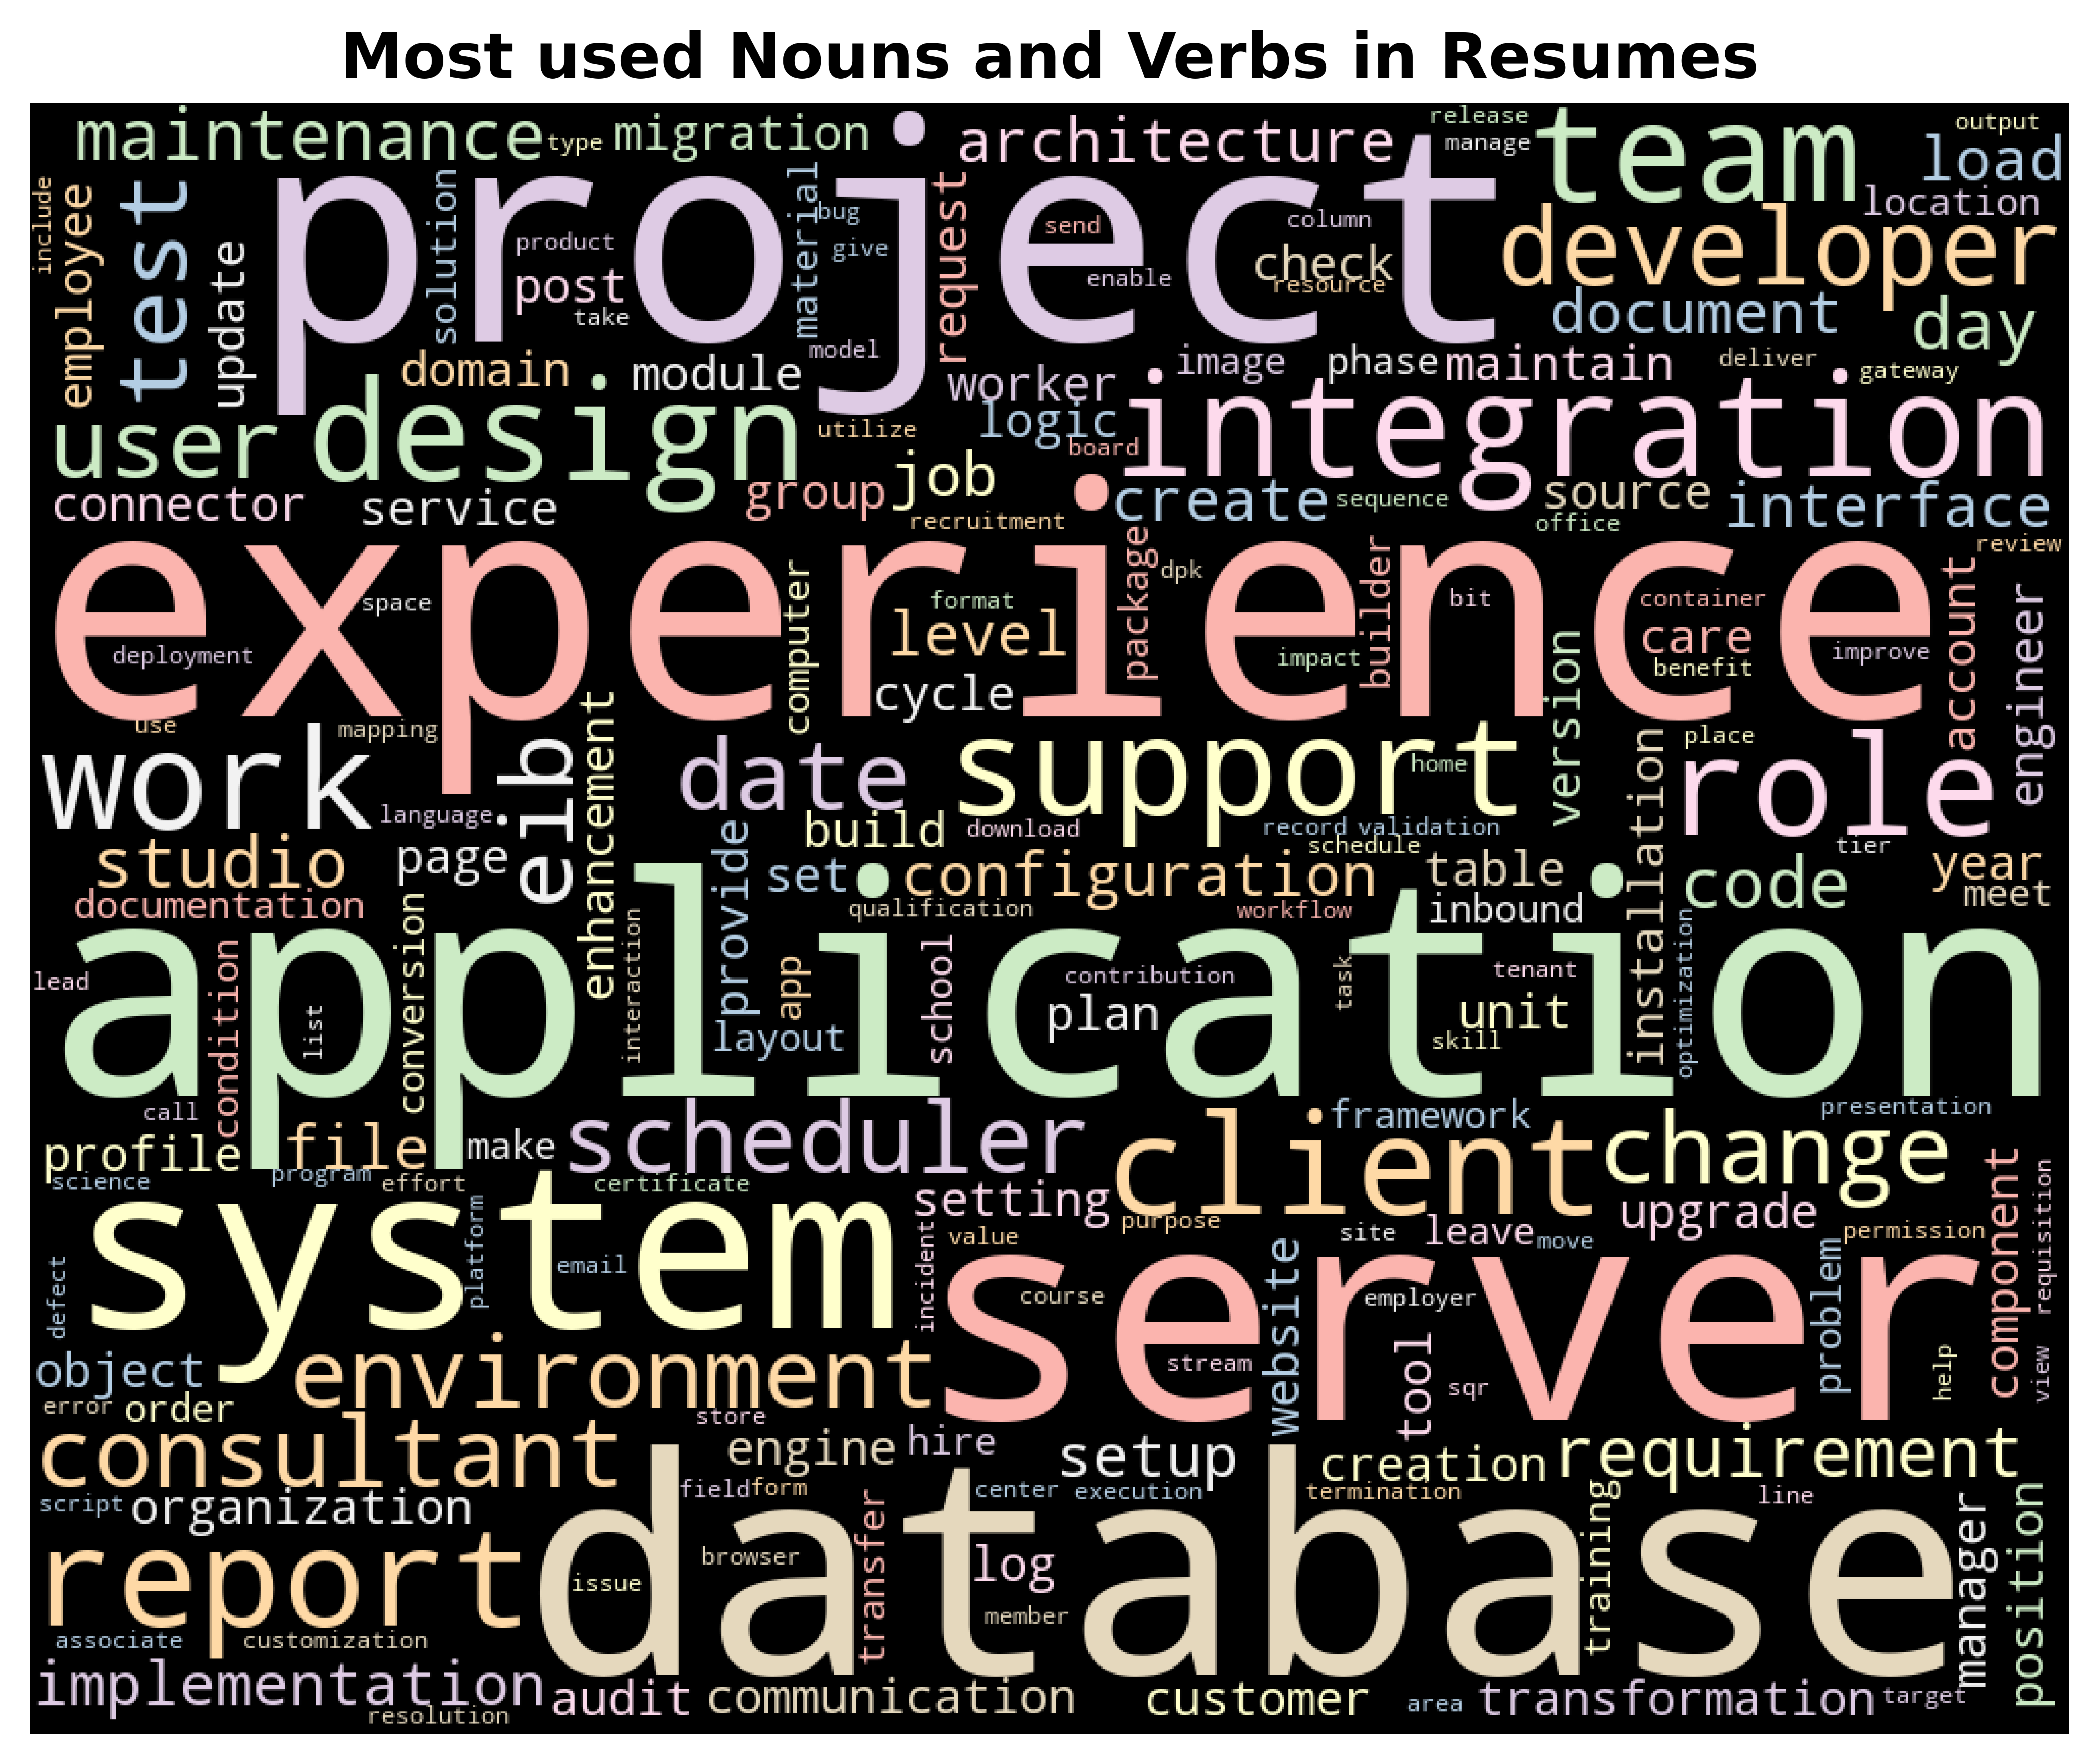

In [44]:
#creating a wordcloud of nouns and verbs in resume 
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('Word_Clowds_Noun_Verb.png')
plt.show()

#    ... the beginning